# Initialize


In [1]:
# What version of Python do you have?
import sys

import pandas as pd
import sklearn as sk
import tensorflow as tf
from matplotlib import pyplot as plt
import keras


print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

2022-12-09 09:27:05.160991: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 09:27:05.990110: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 09:27:05.990149: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 09:27:08.959014: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

Tensor Flow Version: 2.11.0
Keras Version: 2.11.0

Python 3.8.10 (default, Jun 22 2022, 20:18:18) 
[GCC 9.4.0]
Pandas 1.5.1
Scikit-Learn 1.1.3
GPU is NOT AVAILABLE


2022-12-09 09:27:11.312840: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-09 09:27:11.313351: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-09 09:27:11.313388: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aidanLaptop): /proc/driver/nvidia/version does not exist


# Load Data

In [ ]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../Data/cleaned.csv')

y = df.pop('median_house_value')

# Generate a subset for testing
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1)

# Define and Compile Model

In [13]:
from keras import layers

In [25]:
# Create a CNN model that trains on the data
def create_model():
    model = keras.Sequential([    
        keras.Input(shape=(13,)),
        keras.layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='softmax'),
        keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [26]:
# Train the data to use the df to predict y
model = create_model()
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
581/581 [==============================] - 3s 3ms/step - loss: 0.5783 - mae: 0.5668 - mse: 0.5783
Epoch 2/100
581/581 [==============================] - 2s 3ms/step - loss: 0.3590 - mae: 0.4358 - mse: 0.3590
Epoch 3/100
581/581 [==============================] - 2s 3ms/step - loss: 0.2955 - mae: 0.3924 - mse: 0.2955
Epoch 4/100
581/581 [==============================] - 2s 3ms/step - loss: 0.2716 - mae: 0.3723 - mse: 0.2716
Epoch 5/100
581/581 [==============================] - 2s 3ms/step - loss: 0.2586 - mae: 0.3595 - mse: 0.2586
Epoch 6/100
581/581 [==============================] - 2s 3ms/step - loss: 0.2521 - mae: 0.3522 - mse: 0.2521
Epoch 7/100
581/581 [==============================] - 2s 3ms/step - loss: 0.2453 - mae: 0.3450 - mse: 0.2453
Epoch 8/100
581/581 [==============================] - 2s 3ms/step - loss: 0.2428 - mae: 0.3413 - mse: 0.2428
Epoch 9/100
581/581 [==============================] - 2s 3ms/step - loss: 0.2384 - mae: 0.3382 - mse: 0.2384
Epoch 10/1

# Evaluate Performance

65/65 - 0s - loss: 0.2017 - mae: 0.2975 - mse: 0.2017 - 451ms/epoch - 7ms/step
Testing set Mean Abs Error:  0.30 MPG
65/65 [==============================] - 0s 4ms/step


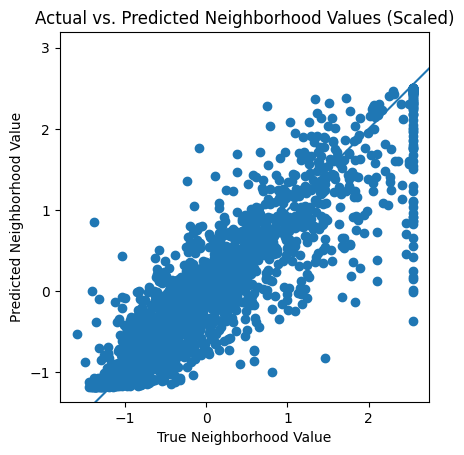

In [27]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

# Make predictions
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.title('Actual vs. Predicted Neighborhood Values (Scaled)')
plt.xlabel('True Neighborhood Value')
plt.ylabel('Predicted Neighborhood Value')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-100, 100], [-100, 100])

# Create a linear regression

In [47]:
# complete a linear regression using the statsmodels library
import statsmodels.api as sm

# create a multivariate linear regression model of the data
# the dependent variable is the 'median_house_value' column
lm = sm.OLS(y, df)

# fit the model to the data
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3130.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:27:50   Log-Likelihood:                -18585.
No. Observations:               20640   AIC:                         3.720e+04
Df Residuals:                   20627   BIC:                         3.730e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
longitude                     -0.4594      0.018    -26.092      0.000      -0.494      -0.425
latitude                      -0.4664      0.019    -25.200      0.000      -0.503      -0.430
housing_median_age             0.1154      0.005     24.205      0.000       0.106       0.125
total_rooms                   -0.0902      0.015     -6.186      0.000      -0.119      -0.062
total_bedrooms                 0.2626      0.022     12.080      0.000       0.220       0.305
population                    -0.3853      0.010    -36.896      0.000      -0.406      -0.365
households                     0.2549      0.022     11.490      0.000       0.211       0.298
median_income                  0.6384      0.005    116.635      0.000       0.628       0.649
ocean_proximity_<1H OCEAN      0.1072      0.007     14.790      0.000       0.093       0.121
ocean_proximity_INLAND        -0.2370      0.011    -21.579      0.000      -0.259      -0.216
ocean_proximity_ISLAND         1.4594      0.267      5.473      0.000       0.937       1.982
ocean_proximity_NEAR BAY       0.0752      0.015      5.048      0.000       0.046       0.104
ocean_proximity_NEAR OCEAN     0.1483      0.013     11.488      0.000       0.123       0.174
==============================================================================
Omnibus:                     5175.381   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19749.153
Skew:                           1.212   Prob(JB):                         0.00
Kurtosis:                       7.133   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Compare Model to LM

In [48]:
# Compute accuracy of the neural network
from sklearn.metrics import r2_score
print("Neural Network R2 Score: ", r2_score(y_test, test_predictions))
print("Linear Regression R2 Score: ", results.rsquared)

Neural Network R2 Score:  0.8469814561849485
Linear Regression R2 Score:  0.6454747751244776
